## Accessing Obs4MIPs and CMIP Data via ESGF

This notebook demonstrates how to access **CMIP6** and **Obs4MIPs** data using the [intake-esgf](https://intake-esgf.readthedocs.io/en/latest/) package. 

To run this notebook, you'll need to install **intake-esgf**. You can install it using the following command:

```bash
conda install -c conda-forge intake-esgf
```

Alternatively, you can follow the [official documentation](https://intake-esgf.readthedocs.io/en/latest/) for more installation details and usage instructions.

In [1]:
import intake_esgf

The catalog can be configured by following the instructions outlined in the [intake-esgf configuration documentation](https://intake-esgf.readthedocs.io/en/latest/configure.html). This allows you to set up indices that provide access to specific datasets. 

For instance, the following example demonstrates how to access the **Lawrence Livermore National Laboratory (LLNL)** Solr index, which supports a wide range of ESGF datasets. By configuring the index in this way, you can easily query and retrieve the data you need from the ESGF network.

Refer to the [configuration guide](https://intake-esgf.readthedocs.io/en/latest/configure.html) for more details on setting up additional data sources or modifying the existing configuration to suit your needs.


In [2]:
intake_esgf.conf.set(indices={"esgf-node.llnl.gov":True})

The following cell shows which projects are supported. 

In [3]:
intake_esgf.supported_projects()

['cmip6', 'cmip5', 'cmip3', 'obs4mips', 'drcdp']

---
### Access CMIP Data

In this section, we show how to access the 'temperature at surface' (tas) dataset from CMIP6 (Coupled Model Intercomparison Project). CMIP6 provides various climate model simulations, including tas data for different time periods and scenarios.

In [4]:
cat = intake_esgf.ESGFCatalog()

We can query datasets using the `search` method, as demonstrated in the cell below.

In [5]:
cat.search(
    project="CMIP6",
    variable_id="tas",
    experiment_id="historical",
    source_id="CanESM5",
    member_id="r1i1p1f1",
    table_id="Amon",
)

   Searching indices:   0%|          |0/3 [       ?index/s]

Summary information for 1 results:
mip_era                [CMIP6]
activity_drs            [CMIP]
institution_id         [CCCma]
source_id            [CanESM5]
experiment_id     [historical]
member_id           [r1i1p1f1]
table_id                [Amon]
variable_id              [tas]
grid_label                [gn]
dtype: object

Using the `to_dataset_dict` method, we can load the selected data into a dictionary, with each value containing an `xarray.Dataset`.

In [6]:
dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/3 [       ?index/s]

Adding cell measures:   0%|          |0/1 [     ?dataset/s]

In [7]:
dsd["tas"]

<xarray.Dataset> Size: 65MB
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 1kB ...
    lon_bnds   (lon, bnds) float64 2kB ...
    tas        (time, lat, lon) float32 65MB ...
    areacella  (lat, lon) float32 33kB ...
Attributes: (12/55)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0
    activity_drs:                CMIP
    member_id:                   r1i1p1f1

In the following cell, we calculate the mean temperature over time, convert it to degrees Celsius, and plot the global surface temperature variable.

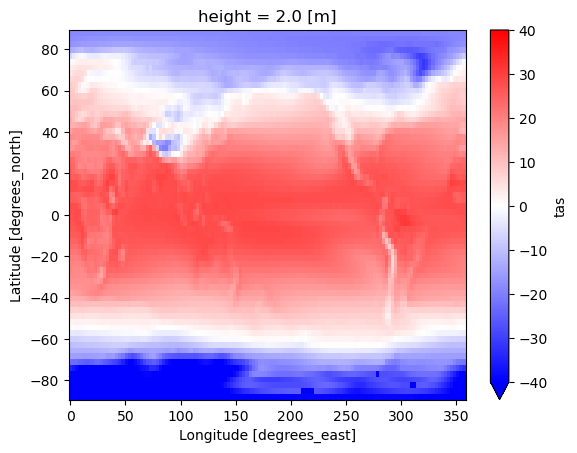

In [8]:
ds_plot = dsd["tas"]["tas"].mean(dim="time") - 273.15
ds_plot.plot(cmap="bwr", vmin=-40, vmax=40)

---
### Access obs4MIPS

In this section, we show how to access the 'temperature at surface' (tas) dataset from obs4MIPS (Observations for Model Intercomparison Projects). obs4MIPS is a project that provides observational datasets for comparison with climate model outputs.

We first use the `search` method to get the desired dataset.

In [9]:
cat.search(
    project="obs4MIPs",
    institution_id="ECMWF",
    variable_id="tas",
)

   Searching indices:   0%|          |0/3 [       ?index/s]

Summary information for 1 results:
activity_id       [obs4MIPs]
institution_id       [ECMWF]
source_id            [ERA-5]
frequency              [mon]
variable_id            [tas]
grid_label              [gn]
dtype: object

We load the search results into a dictionary and extract the `xarray.Dataset` containing the data in the subsequent cell.

In [10]:
dsd = cat.to_dataset_dict()

Get file information:   0%|          |0/3 [       ?index/s]

In [11]:
dsd["tas"]

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 528, bnds: 2, lat: 721, lon: 1440)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-16T12:00:00 ... 2022-12-16T1...
  * lat        (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon        (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 8kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 6MB dask.array<chunksize=(12, 721, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 12MB dask.array<chunksize=(12, 1440, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 2GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes: (12/41)
    CONVERSION_DATE:             Mon Nov 11 07:48:24 MST 2019
    CONVERSION_PLATFORM:         Linux casper02 3.10.0-693.21.1.el7.x86_64 #1...
    Conventions:                 CF-1.11; ODS-2.5
    DATA_SOURCE:                 ECMWF: https://cds.climate.copernicus.eu, Co...
    NCO:                         netCDF Operators version 4.7.9 (Homepage = h...
    NETCDF_COMPRESSION:          NCO: Precision-preserving compression to net...
    ...                          ...
    tracking_id:                 hdl:21.14102/003d2533-c769-4a37-b5de-8a0cd03...
    variable_id:                 tas
    variant_info:                obs4MIPs-compliant product prepared by PCMDI...
    variant_label:               PCMDI
    license:                     License to use Copernicus products available...
    cmor_version:                3.9.0

In the following cell, we calculate the mean temperature over time, convert it to degrees Celsius, and plot the global surface temperature variable.

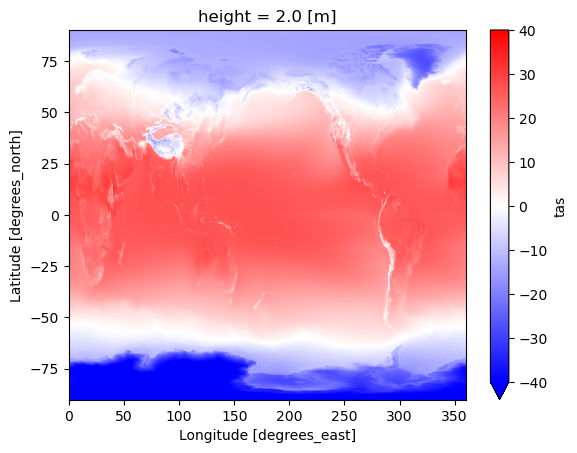

In [12]:
ds_plot = dsd["tas"]["tas"].mean(dim="time") - 273.15  
ds_plot.plot(cmap="bwr", vmin=-40, vmax=40)